# KRAS Mutation Trans Effect on Proteomics

This notebook analyzes the trans effect of KRAS mutation on interacting and other proteins, in Endometrial and Colon cancer.

### Library Imports

In [53]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al

en = cptac.Endometrial()
co = cptac.Colon()

Checking that index is up-to-date...Loading acetylproteomics data...Loading clinical data...Loading CNA data...Loading definitions data...Loading miRNA data...Loading phosphoproteomics_gene data...Loading phosphoproteomics_site data...Loading proteomics data...Loading somatic_binary data...Loading somatic data...Loading transcriptomics_circular data...Loading transcriptomics_linear data...Formatting dataframes...Checking that index is up-to-date...Loading clinical data...Loading miRNA data...Loading mutation_binary data...Loading mutation data...Loading phosphoproteomics_normal data...Loading phosphoproteomics_tumor data...Loading proteomics_normal data...Loading proteomics_tumor data...Loading transcriptomics data...Formatting dataframes...

### Investigate KRAS gene

In [29]:
gene = "KRAS"

### Investigate Proteomics, Phosphoproteomics, Acetylproteomics, or Transcriptomics

In [30]:
omics = "proteomics"
#omics = "transcriptomics"
#omics = "phosphoproteomics"
#omics = "acetylproteomics"

# Interacting Proteins: proteomics

## Endometrial

### Generate interacting protein list

In [31]:
'''Use get interacting proteins method to generate list of interacting proteins'''

#comment about how this returns ranked interacting proteins (F/ uniprot or string)
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = en.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
RAF1
MAPK1
KRAS
MAP2K2
MAPK3
PIK3CA
ERBB3
ERBB2
EGFR
BRAF
PIK3CB
ARAF
MAP2K1
PTPN11
NF1
PIK3CG
NRAS
SRC
GRB2
SOS1
HRAS
CDKN2A
RAP1GDS1
HNRNPC
RASSF2
RASSF5


### Test for significant comparisons in any of interacting proteins

In [32]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

Doing t-test comparisons

No significant comparisons.


## Colon

### Generate interacting protein list

In [33]:
'''Use get interacting proteins method to generate list of interacting proteins'''
interacting_proteins = al.get_interacting_proteins(gene)

omics_object = co.get_proteomics()

print("Generating interacting protein list")
interacting_proteins_in_omics_df = []

'''Only do comparisons on proteins in the omics dataframe'''
for ip in interacting_proteins:
    if omics == 'phosphoproteomics' or omics == 'acetylproteomics':
        col_regex = ip + "-.*" # Build a regex to get all columns that match the gene
    else:
        col_regex = '^{}$'.format(ip)

    selected = omics_object.filter(regex=col_regex)

    if len(selected.columns) > 0:
        interacting_proteins_in_omics_df.append(ip)

print("Interacting Proteins:")
for interacting_protein in interacting_proteins_in_omics_df:
    print(interacting_protein)

Generating interacting protein list
Interacting Proteins:
RAF1
MAPK1
KRAS
MAP2K2
MAPK3
PIK3CA
ERBB3
ERBB2
EGFR
BRAF
PIK3CB
ARAF
MAP2K1
PTPN11
NF1
NRAS
SRC
GRB2
SOS1
HRAS
CDKN2A
RAP1GDS1
HNRNPC
RASSF2
RASSF5


### Test for significant comparisons in any of interacting proteins

In [34]:
'''Create dataframe in order to do comparisons with wrap_ttest'''
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=interacting_proteins_in_omics_df)
protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']

'''Create the binary valued column needed to do the comparison'''
for ind, row in protdf.iterrows():
    if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
        protdf.at[ind,'Label'] = 'Mutated'
    else:
        protdf.at[ind,'Label'] = 'Wildtype'

'''Format the dataframe correctly'''
protdf = protdf.drop(gene+"_Mutation",axis=1)
protdf = protdf.drop(gene+"_Location",axis=1)
protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
protdf = protdf.drop("Sample_Status",axis=1)

'''Make list of columns to be compared using t-tests'''
col_list = list(protdf.columns)
col_list.remove('Label')

print("Doing t-test comparisons\n")

'''Call wrap_ttest, pass in formatted dataframe'''
wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

'''Print results, if anything significant was found'''
if wrap_results is not None:
        print(wrap_results)
        print("\n\n")

Doing t-test comparisons

No significant comparisons.


# All Proteins: proteomics

## Endometrial

In [28]:
try:
    print("\nGene: ", gene)

    '''Use all proteins'''
    all_proteins = proteomics.columns
    #all_proteins = all_proteins[:100]

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the datafram correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  KRAS
Doing t-test comparisons



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


         Comparison       P_Value
0  SPRY1_proteomics  7.362178e-08





## Colon

In [35]:
try:
    print("\nGene: ", gene)
    
    proteomics = co.get_proteomics()
    '''Use all proteins'''
    all_proteins = proteomics.columns
    #all_proteins = all_proteins[:100]

    '''Create dataframe in order to do comparisons with wrap_ttest'''
    protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=all_proteins)
    protdf = protdf.loc[protdf['Sample_Status'] == 'Tumor']
    
    '''Create the binary valued column needed to do the comparison'''
    for ind, row in protdf.iterrows():
        if row[gene+"_Mutation_Status"] != 'Wildtype_Tumor':
            protdf.at[ind,'Label'] = 'Mutated'
        else:
            protdf.at[ind,'Label'] = 'Wildtype'

    '''Format the dataframe correctly'''
    protdf = protdf.drop(gene+"_Mutation",axis=1)
    protdf = protdf.drop(gene+"_Location",axis=1)
    protdf = protdf.drop(gene+"_Mutation_Status", axis=1)
    protdf = protdf.drop("Sample_Status",axis=1)

    '''Make list of columns to be compared using t-tests'''
    col_list = list(protdf.columns)
    col_list.remove('Label')

    print("Doing t-test comparisons\n")
    
    '''Call wrap_ttest, pass in formatted dataframe'''
    wrap_results = al.wrap_ttest(protdf, 'Label', col_list)

    '''Print results, if anything significant was found'''
    if wrap_results is not None:
            print(wrap_results)
            print("\n\n")

except Exception as e:
    print("Error in Comparison")
    print(e)


Gene:  KRAS
Doing t-test comparisons



/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


No significant comparisons.


## Examine SPRY1 in Endometrial and Colon Cancer

#### SPRY1 in Endometrial

In [46]:
#Endometrial
protdf = en.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["SPRY1"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['SPRY1_proteomics'], wtdf['SPRY1_proteomics'])
print("P-Value = ", pval)

P-Value =  7.362178310531698e-08


#### Plot

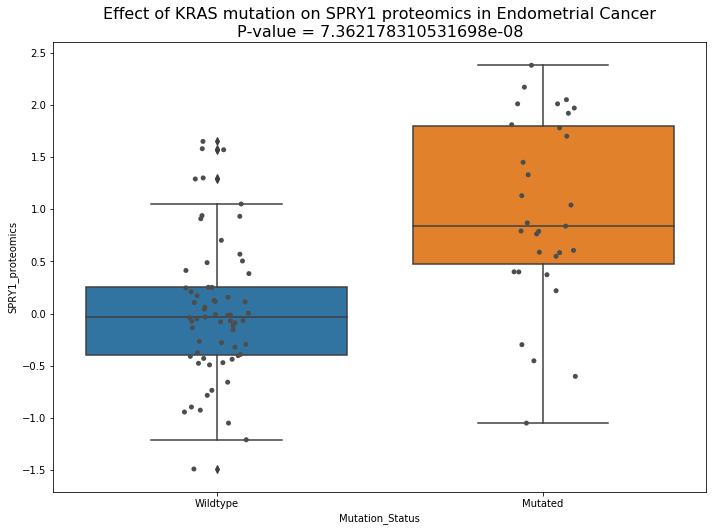

In [67]:
for ind, row in protdf.iterrows():
    if row['KRAS_Mutation_Status'] != 'Wildtype_Tumor':
        protdf.loc[ind,'Mutation_Status'] = "Mutated"
    else:
        protdf.loc[ind,'Mutation_Status'] = "Wildtype"
        

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize = a4_dims)
boxplt = sns.boxplot(data = protdf, y = 'SPRY1_proteomics',x='Mutation_Status', ax = ax)
boxplt = sns.stripplot(data = protdf, y = 'SPRY1_proteomics', x = 'Mutation_Status', jitter = True, color = '.3')

boxplt.set_title("Effect of " + gene + " mutation on SPRY1 proteomics in Endometrial Cancer" + '\nP-value = ' + str(pval), fontsize='16')

plt.show()

#### SPRY1 in Colon

In [68]:
protdf = co.append_mutations_to_omics(mutation_genes=[gene], omics_df_name=omics, omics_genes=["SPRY1"])
protdf = protdf.loc[protdf['Sample_Status'] == "Tumor"]

mutdf = protdf.loc[protdf[gene+"_Mutation_Status"] != "Wildtype_Tumor"]
wtdf = protdf.loc[protdf[gene+"_Mutation_Status"] == "Wildtype_Tumor"]

stat, pval = scipy.stats.ttest_ind(mutdf['SPRY1_proteomics'], wtdf['SPRY1_proteomics'])
print("P-Value = ", pval)

SPRY1 did not match any columns in proteomics dataframe. SPRY1_proteomics column inserted, but filled with NaN.
P-Value =  nan


# Conclusions

The only statistically identifiable effect of KRAS mutation on Proteomic abundance (in Endometrial and Colon Cancers) is a significant difference in protein abundance of SPRY1 in Endometrial Cancer. This protein is not present in the Colon Cancer dataset, so it is unclear whether this significant difference also occurs in KRAS mutation in Colon Cancer.